In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [110]:
#Import the file
SP_df_raw = pd.read_csv("HistoricalDataS&P.csv")

# Reversing the order of rows
SP_df = SP_df_raw.iloc[::-1]
SP_df = SP_df.reset_index(drop=True)

# Deleting zero rows indicating market/bank holidays

SP_df = SP_df[(SP_df['High']!=0)]
SP_df = SP_df.reset_index(drop=True)

# Change the date to actual date format
SP_df['Date'] = pd.to_datetime(SP_df['Date'])

# Rename the Close/Last column to Close
SP_df.rename(columns = {'Close/Last': 'Close'}, inplace = True)

# Define new variables

# This tracks the daily difference between High and Low
SP_df['HLDiff'] = SP_df['High'] - SP_df['Low']

# This tracks the daily difference between Closing and Opening Data
SP_df['DayDiff'] = SP_df['Close'] - SP_df['Open']

# This tracks the difference between Opening Data of a Day and Closing Data of the Previous Day
SP_df['OvernightDiff'] = SP_df['Open'] - SP_df['Close'].shift(1)

# Move or Binary Move tells us whether from Day n, Close goes up ( = 1) or down (=0)
SP_df['Change'] = np.where(SP_df['Close'].shift(-1) - SP_df['Close'] > 0, 1, 0)
SP_df['Move'] = np.where(SP_df['Close'].shift(-1) - SP_df['Close'] > 0, 1, 0)

# Move or Binary Move tells us whether from Day n, Close goes up ( = 1) or down (=0)
SP_df['Lag-1'] = SP_df['Close'].shift(1)
SP_df['Lag-2'] = SP_df['Close'].shift(2)
SP_df['Lag-3'] = SP_df['Close'].shift(3)
SP_df['Lag-4'] = SP_df['Close'].shift(4)
SP_df['Lag-5'] = SP_df['Close'].shift(5)
SP_df['Lag-6'] = SP_df['Close'].shift(6)
SP_df['Lag-7'] = SP_df['Close'].shift(7)
SP_df['RolAvg7'] = SP_df[['Lag-1','Lag-2','Lag-3', 'Lag-4', 'Lag-5', 'Lag-6', 'Lag-7']].mean(axis=1)
SP_df['RolAvg5'] = SP_df[['Lag-1','Lag-2','Lag-3', 'Lag-4', 'Lag-5']].mean(axis=1)

In [111]:
SP_df

,Date,Close,Open,High,Low,HLDiff,DayDiff,OvernightDiff,Move,Lag-1,Lag-2,Lag-3,Lag-4,Lag-5,Lag-6,Lag-7,RolAvg7,RolAvg5
0,2013-10-28,1762.11,1759.42,1764.99,1757.67,7.32,2.69,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-29,1771.95,1762.93,1772.09,1762.93,9.16,9.02,0.82,0,1762.11,NaN,NaN,NaN,NaN,NaN,NaN,1762.110000,1762.1100
2,2013-10-30,1763.31,1772.27,1775.22,1757.24,17.98,-8.96,0.32,0,1771.95,1762.11,NaN,NaN,NaN,NaN,NaN,1767.030000,1767.0300
3,2013-10-31,1756.54,1763.24,1768.53,1755.72,12.81,-6.70,-0.07,1,1763.31,1771.95,1762.11,NaN,NaN,NaN,NaN,1765.790000,1765.7900
4,2013-11-01,1761.64,1758.70,1765.67,1752.70,12.97,2.94,2.16,1,1756.54,1763.31,1771.95,1762.11,NaN,NaN,NaN,1763.477500,1763.4775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2023-10-23,4217.04,4210.40,4255.84,4189.22,66.62,6.64,-13.76,1,4224.16,4278.00,4314.60,4373.20,4373.63,4327.78,4349.61,4320.140000,4312.7180
2514,2023-10-24,4247.68,4235.79,4259.38,4219.43,39.95,11.89,18.75,0,4217.04,4224.16,4278.00,4314.60,4373.20,4373.63,4327.78,4301.201429,4281.4000
2515,2023-10-25,4186.77,4232.42,4232.42,4181.42,51.00,-45.65,-15.26,0,4247.68,4217.04,4224.16,4278.00,4314.60,4373.20,4373.63,4289.758571,4256.2960
2516,2023-10-26,4137.23,4175.99,4183.60,4127.90,55.70,-38.76,-10.78,0,4186.77,4247.68,4217.04,4224.16,4278.00,4314.60,4373.20,4263.064286,4230.7300


In [4]:
print("Opening Data:", SP_df['Open'].max(), SP_df['Open'].min())
print("Closing Data:", SP_df['Close'].max(), SP_df['Close'].min(), SP_df['Close'].mean())
print("High Data:", SP_df['High'].max(), SP_df['High'].min())
print("Low Data:", SP_df['Low'].max(), SP_df['Low'].min())
print("HighLowDiff Data:", SP_df['HLDiff'].max(), SP_df['HLDiff'].min())
print("DayDiff Data:", SP_df['DayDiff'].max(), SP_df['DayDiff'].min())
print("Overnight Change Data:", SP_df['OvernightDiff'].max(), SP_df['OvernightDiff'].min())

Opening Data: 4804.51 1743.82
Closing Data: 4796.56 1741.89 2957.812819698174
High Data: 4818.62 1755.79
Low Data: 4780.04 1737.92
HighLowDiff Data: 218.96000000000004 3.7000000000000455
DayDiff Data: 149.53999999999996 -150.22000000000025
Overnight Change Data: 111.31999999999971 -202.42999999999984


,Date,Close,Open,High,Low,HLDiff,DayDiff,OvernightDiff,Move,Lag-1,Lag-2,Lag-3,Lag-4,Lag-5,Lag-6,Lag-7
0,2013-10-28,1762.11,1759.42,1764.99,1757.67,7.32,2.69,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-29,1771.95,1762.93,1772.09,1762.93,9.16,9.02,0.82,0,1762.11,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-30,1763.31,1772.27,1775.22,1757.24,17.98,-8.96,0.32,0,1771.95,1762.11,NaN,NaN,NaN,NaN,NaN
3,2013-10-31,1756.54,1763.24,1768.53,1755.72,12.81,-6.70,-0.07,1,1763.31,1771.95,1762.11,NaN,NaN,NaN,NaN
4,2013-11-01,1761.64,1758.70,1765.67,1752.70,12.97,2.94,2.16,1,1756.54,1763.31,1771.95,1762.11,NaN,NaN,NaN


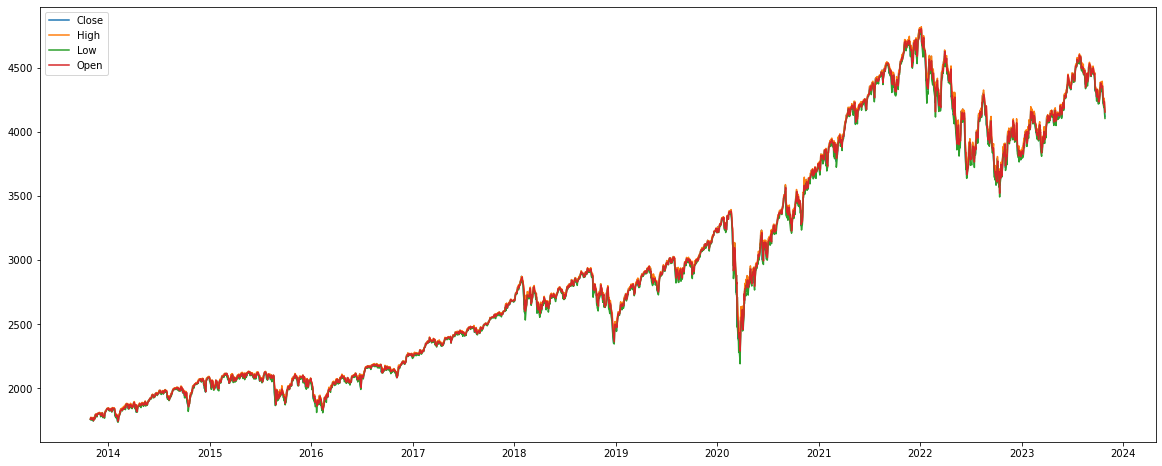

In [5]:
plt.figure(figsize=(20,8))


plt.plot(SP_df['Date'], SP_df['Close'], label = "Close")
plt.plot(SP_df['Date'], SP_df['High'], label = "High")
plt.plot(SP_df['Date'], SP_df['Low'], label = "Low")
plt.plot(SP_df['Date'], SP_df['Open'], label = "Open")
plt.legend()

SP_df.head()

,Date,Close,Open,High,Low,HLDiff,DayDiff,OvernightDiff,Move
1603,2020-03-12,2480.64,2630.86,2660.95,2478.86,182.09,-150.22,-110.52,1
1604,2020-03-13,2711.02,2569.99,2711.33,2492.37,218.96,141.03,89.35,0
1605,2020-03-16,2386.13,2508.59,2562.98,2380.94,182.04,-122.46,-202.43,1
1606,2020-03-17,2529.19,2425.66,2553.93,2367.04,186.89,103.53,39.53,0


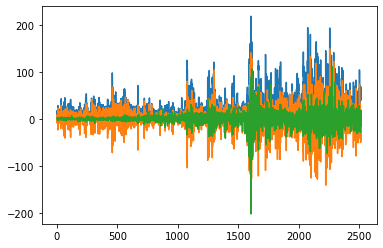

In [7]:
plt.plot(SP_df['HLDiff'])
plt.plot(SP_df['DayDiff'])
plt.plot(SP_df['OvernightDiff'])

#Locating the sharpest fall in OvernightDiff
SP_df['OvernightDiff'].idxmin()
SP_df.iloc[SP_df['OvernightDiff'].idxmin()-2: SP_df['OvernightDiff'].idxmin()+2]

# Baseline Forecasts

In [ ]:
## Import 
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime, timedelta
from seaborn import set_style
from sklearn.metrics import mean_squared_error
set_style("whitegrid")


In [ ]:
num_test = -120

SP_train = SP_df.iloc[:num_test].copy()
SP_test = SP_df.iloc[num_test:].copy()

In [ ]:
## Making the average "prediction"
SPclose_avg = SP_train.Close.mean()*np.ones(len(SP_test))

## Plotting the average prediction with the actual data
plt.figure(figsize=(20, 8))

plt.plot(SP_train.Date[-100:],
            SP_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(SP_test.Date,
            SP_test.Close,
            'r-',
            label="Test Data")

plt.plot(SP_test.Date,
            SPclose_avg,
            'r--',
            label="Average Prediction")

### Why 2980?
plt.text(SP_train.Date.values[-10],
         4600,
         "Average PMSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                                                  SPclose_avg), 2)),
         fontsize=15)

plt.legend(fontsize=15, loc=2)

plt.show()

In [ ]:
## Making the naive "prediction"
SPclose_naive = SP_train.Close.values[-1]*np.ones(len(SP_test))

## Plotting the naive prediction with the actual data
plt.figure(figsize=(20, 8))

plt.plot(SP_train.Date[-100:],
            SP_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(SP_test.Date,
            SP_test.Close,
            'r-',
            label="Test Data")

plt.plot(SP_test.Date,
            SPclose_naive,
            'r--',
            label="Naive Prediction")

### Why 2980?
plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                                                  SPclose_naive), 2)),
         fontsize=15)

plt.legend(fontsize=15, loc=2)

plt.show()

In [ ]:
## import linear regression
from sklearn.linear_model import LinearRegression

## Make the model object
reg = LinearRegression()

## Fit the model
reg.fit(np.arange(1, len(SP_train) + 1).reshape(-1,1),
        SP_train.Close)

## Make the forecast
trend_pred = reg.predict(np.arange(len(SP_train)+1, len(SP_test) + len(SP_train) + 1).reshape(-1,1))


## Plotting the naive prediction with the actual data
plt.figure(figsize=(20, 8))

plt.plot(SP_train.Date[-100:],
            SP_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(SP_test.Date,
            SP_test.Close,
            'r-',
            label="Test Data")

plt.plot(SP_test.Date,
            trend_pred,
            'r--',
            label="Trend Forecast Prediction")

### Why 2980?
plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                                                  trend_pred), 2)),
         fontsize=15)

plt.legend(fontsize=15, loc=2)

plt.show()

In [ ]:
# Calculating Drift

beta_hat = SP_train.Close.diff().mean()

drift_pred = SP_train.Close.values[-1] + beta_hat*np.arange(1,len(SP_test) + 1)



## Plotting the naive prediction with the actual data
plt.figure(figsize=(20, 8))

plt.plot(SP_train.Date[-100:],
            SP_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(SP_test.Date,
            SP_test.Close,
            'r-',
            label="Test Data")

plt.plot(SP_test.Date,
            drift_pred,
            'r--',
            label="Trend Forecast Prediction (Drift)")

### Why 2980?
plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                                                  drift_pred), 2)),
         fontsize=15)

plt.legend(fontsize=15, loc=2)

plt.show()

In [ ]:
## Making the average "prediction"
SPclose_avg = SP_train.Close.mean()*np.ones(len(SP_test))
## Making the naive "prediction"
SPclose_naive = SP_train.Close.values[-1]*np.ones(len(SP_test))

## import linear regression
from sklearn.linear_model import LinearRegression
## Make the model object
reg = LinearRegression()
## Fit the model
reg.fit(np.arange(1, len(SP_train) + 1).reshape(-1,1),
        SP_train.Close)
## Make the forecast
trend_pred = reg.predict(np.arange(len(SP_train)+1, len(SP_test) + len(SP_train) + 1).reshape(-1,1))

# Calculating Drift
beta_hat = SP_train.Close.diff().mean()
drift_pred = SP_train.Close.values[-1] + beta_hat*np.arange(1,len(SP_test) + 1)



## Plotting the average prediction with the actual data
plt.figure(figsize=(20, 8))

plt.plot(SP_train.Date[-100:],
            SP_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(SP_test.Date,
            SP_test.Close,
            'r-',
            label="Test Data")

plt.plot(SP_test.Date,
            SPclose_naive,
            'r--',
            label="Naive Prediction")

plt.plot(SP_test.Date,
            trend_pred,
            'g--',
            label="Trend Forecast Prediction")

plt.plot(SP_test.Date,
            drift_pred,
            'k--',
            label="Trend Forecast Prediction (Drift)")

plt.plot(SP_test.Date,
            SPclose_avg,
            'c--',
            label="Average Prediction")

plt.text(SP_train.Date.values[-10],
         3200,
         "Average PMSE = " + str(np.round(np.sqrt(mean_squared_error(SP_test.Close.values,
                                                                  SPclose_avg)), 2)),
         fontsize=15)

plt.text(SP_train.Date.values[-10],
         3100,
         "Naive PMSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                                                  SPclose_naive), 2)),
         fontsize=15)

plt.text(SP_train.Date.values[-10],
         3300,
         "Drift PMSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                                                  drift_pred), 2)),
         fontsize=15)

plt.text(SP_train.Date.values[-10],
         3400,
         "Trend PMSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                                                  trend_pred), 2)),
         fontsize=15)

plt.legend(fontsize=15, loc=2)

plt.show()

# Intermediate Forecasts

In [ ]:
## To use rolling
## specify the column you want the moving average of
## give the window size as the argument
## then give what you want the moving statistic of, we want the mean()
## Finally set the argument closed='left' to ensure that y_{t+1} is the average
## of the previous k values.

rolling_num = 3

SP_train['Moving_Avg'] = SP_train.Close.rolling( rolling_num , closed='left').mean()


plt.figure(figsize=(20,8))


plt.plot(SP_train.Date[-100:],
            SP_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(SP_train.Date[-100:], 
         SP_train.Close.rolling(rolling_num, closed="left").mean()[-100:],
         'g--',
         label="Training Rolling Average")

plt.plot(SP_test.Date,
            SP_test.Close,
            'r-',
            label="Test Data")

plt.plot(SP_test.Date, 
         SP_train.Close[- rolling_num:].mean()*np.ones(-num_test),
         'r--o',
         label="Rolling Average Prediction")

plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                            SP_train.Close[- rolling_num:].mean()*np.ones(-num_test)), 2)),
         fontsize=15)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()


In [ ]:
weights = [2/3, 1/6, 1/6]

def weight_avg(t):
    avg = 0
    for i in range(len(weights)):
        avg = avg + weights[i]*SP_train.Close.values[t-i-1]
    return avg

SP_train_fit = []

for i in range(len(weights),len(SP_train)):
    SP_train_fit.append(weight_avg(i))
        
        
pred = weight_avg(len(SP_train))

In [ ]:
plt.figure(figsize=(20,8))


plt.plot(SP_train.Date[-100:],
            SP_train.Close[-100:],
            'b-',
            label="Training Data")

plt.plot(SP_train.Date[-100:], 
         SP_train_fit[-100:],
         'g--',
         label="Training Weighted Rolling Average")

plt.plot(SP_test.Date,
            SP_test.Close,
            'r-',
            label="Test Data")

plt.plot(SP_test.Date, 
         pred*np.ones(-num_test),
         'r--o',
         label="Weighted Rolling Average Prediction")

plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                            pred*np.ones(-num_test)), 2)),
         fontsize=15)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()


In [ ]:
# Holt-Winters here

# Autocorrelation

In [ ]:
import statsmodels.api as sm

## first put in the time series
## then set how many lags you want to consider
## the default is lags=30
## we will turn alpha=None
## this turns off the confidence interval lines, which we will not discuss
sm.graphics.tsa.plot_acf(SP_train.Close.values,
                            alpha = 0.5,
                            lags = 30)

plt.title('Closing Price', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

In [ ]:
diff1 = SP_train.Close.diff()
diff2 = diff1.diff()
diff3 = diff2.diff()

sm.graphics.tsa.plot_acf(diff1[1:],
                            alpha = 0.5,
                            lags = 30)

plt.title('First Difference Closing Price', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

sm.graphics.tsa.plot_acf(diff2[2:],
                            alpha = 0.5,
                            lags = 30)

plt.title('Second Difference Closing Price', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

sm.graphics.tsa.plot_acf(diff3[3:],
                            alpha = 0.5,
                            lags = 30)

plt.title('Third Difference Closing Price', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

In [ ]:
pacf = sm.tsa.pacf(SP_train.Close, nlags=30)

#sm.graphis.plot_pacf(SP_train.Close.values,                            alpha = 0.5,lags = 30)

# Autoregressive Models (ARMA, ARIMA, etc)

In [231]:
## Import SARIMAX from tsa.api
from statsmodels.tsa.api import SARIMAX

num_test = -14

SP_train = SP_df.iloc[:num_test].copy()
SP_test = SP_df.iloc[num_test:].copy()

## Making and fitting the model
## Call SARIMAX
## then the training data
## then give the order here we choose (5,1,5)
## call .fit, I have increased the number of iterations
## for the fitting algorithm, with maxiter
arima = SARIMAX(SP_train.Close.values,
                   order=(4, 1, 3)).fit(maxiter=200)

C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


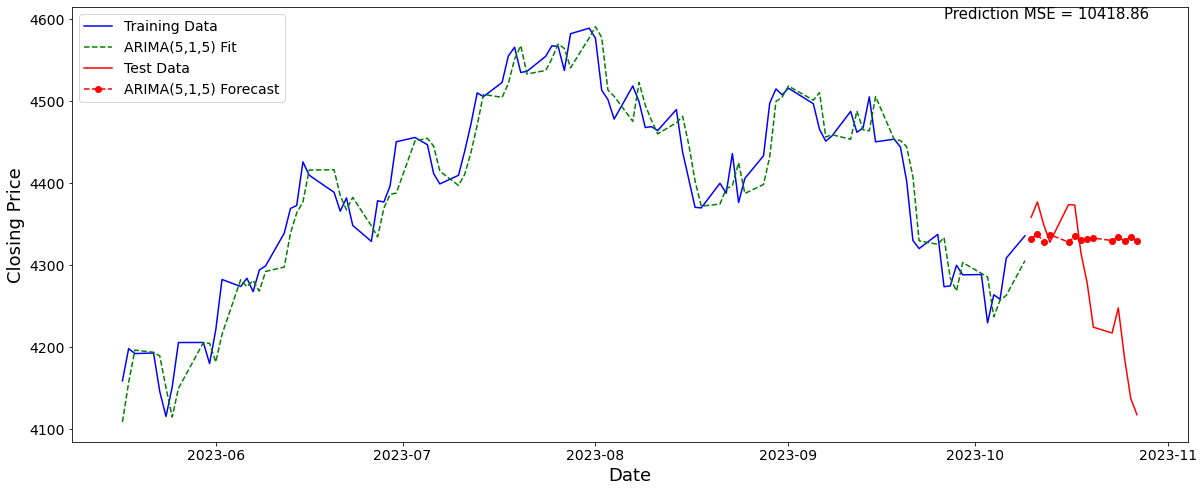

In [232]:
plt.figure(figsize=(20,8))


plt.plot(SP_train.Date[-100:], 
         SP_train.Close[-100:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(SP_train.Date[-100:], 
         arima.fittedvalues[-100:],
         'g--',
         label="ARIMA(5,1,5) Fit")

plt.plot(SP_test.Date, 
         SP_test.Close,
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(SP_test.Date, 
         arima.forecast(len(SP_test)),
         'r--o',
         label="ARIMA(5,1,5) Forecast")



plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round(mean_squared_error(SP_test.Close.values,
                                            arima.forecast(len(SP_test))), 2)),
         fontsize=15)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

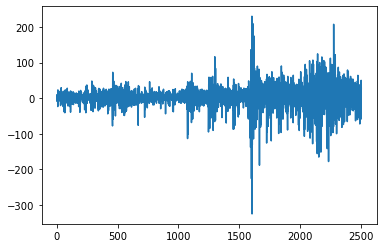

In [233]:
diff1 = SP_train.Close.diff()
diff2 = diff1.diff()
diff3 = diff2.diff()

plt.plot(diff1)
#plt.plot(diff2)
#plt.plot(diff3)
plt.show()

In [234]:
num_test = -14

SP_train = SP_df.iloc[:num_test].copy()
SP_test = SP_df.iloc[num_test:].copy()

def train_arima_model(train_data, order):
    arima = SARIMAX(SP_train.Close.values,
                   order=order).fit(maxiter=500)
    #model = ARIMA(train_data, order=order)
    #fitted_model = model.fit()
    return arima


def generate_forecast(model, test_data):
    forecast = model.predict(start=len(SP_train), end=len(SP_train) + len(SP_test) - 1)
    return forecast

orders = [[1,0,0]]  # Different ARIMA configurations

arima_models = [train_arima_model(SP_train, order) for order in orders]

# Generate forecasts from each ARIMA model
forecasts = [generate_forecast(model, SP_test) for model in arima_models]

print(forecasts)
# Simple average ensemble
ensemble_forecast = np.mean(forecasts, axis=0)

# Evaluate the ensemble performance
ensemble_mse = mean_squared_error(SP_test.Close.values, ensemble_forecast)


[array([4335.22262699, 4334.7852981 , 4334.34801333, 4333.91077268,
       4333.47357613, 4333.03642368, 4332.59931533, 4332.16225108,
       4331.72523092, 4331.28825484, 4330.85132284, 4330.41443493,
       4329.97759108, 4329.5407913 ])]


C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


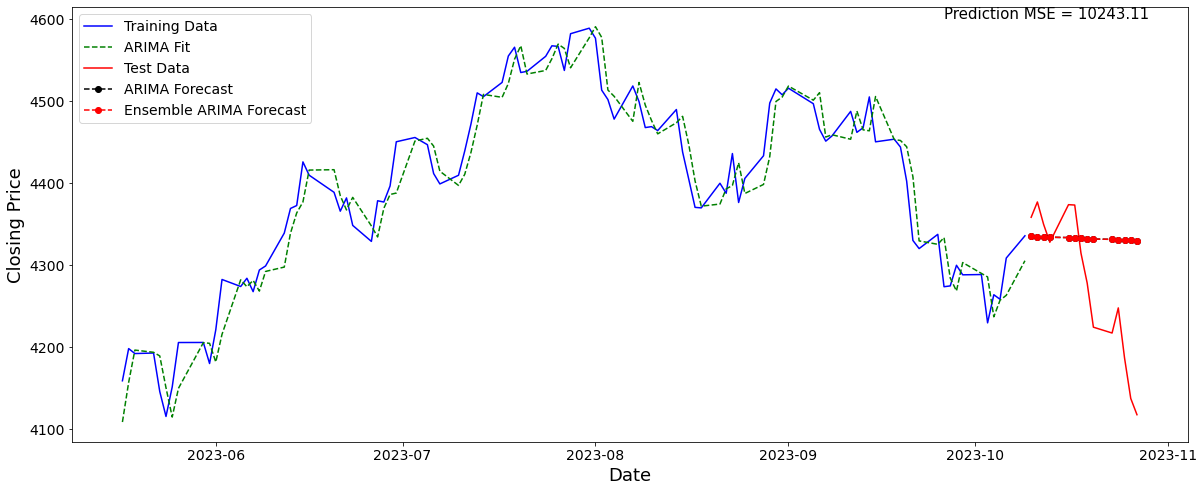

In [235]:
plt.figure(figsize=(20,8))


plt.plot(SP_train.Date[-100:], 
         SP_train.Close[-100:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(SP_train.Date[-100:], 
         arima.fittedvalues[-100:],
         'g--',
         label="ARIMA Fit")

plt.plot(SP_test.Date, 
         SP_test.Close,
         'r',
         label="Test Data")

for forecast in forecasts:
    plt.plot(SP_test.Date, 
             forecast,
                 'k--o',
                 label="ARIMA Forecast")

## We can get the forecast with .forecast(h)
plt.plot(SP_test.Date, 
         ensemble_forecast,
         'r--o',
         label="Ensemble ARIMA Forecast")



plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round((ensemble_mse), 2)),
         fontsize=15)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

In [16]:
#do k fold split and pdq optimization

# k fold split ARIMA

In [ ]:
fro

In [240]:
def train_arima_model(train_data, order):
    arima = SARIMAX(train_data.Close.values,
                   order=order).fit(maxiter=500)
    #model = ARIMA(train_data, order=order)
    #fitted_model = model.fit()
    return arima

def generate_forecast(model, test_data):
    forecast = model.predict(start=len(SP_train), end=len(SP_train) + len(SP_test) - 1)
    return forecast

#orders = [[p,d,q] for p in range(5) for d in range(2) for q in range(5)]  # Different ARIMA configurations
orders = [[3,1,3]]

num_test = -14


SP_train = SP_df.iloc[:num_test].copy()
SP_test = SP_df.iloc[num_test:].copy()

results = []

columns = ['p', 'd', 'q', 'k-fold' ,'RMSE']
# Create an empty DataFrame
arima_rmse_results = pd.DataFrame(columns=columns)

#arima_rmses = np.zeros((10, 5, 2, 5))

kfold = TimeSeriesSplit(30, test_size=14)
#kfold = TimeSeriesSplit(n_splits=10)

j = 0  # counter for the kfold split

for train_index, test_index in kfold.split(SP_train):
    data_tt = SP_train.loc[train_index]
    data_ho = SP_train.loc[test_index]
    print(data_tt)
    print(data_ho)

    for order in orders:
        arima = SARIMAX(data_tt.Close.values,
                                order=(order[0], order[1], order[2])).fit(maxiter=500)
            
        arima_rmse = np.sqrt(mean_squared_error(data_ho.Close.values, 
                                                              arima.forecast(len(data_ho))))
        result = [[order, j, arima_rmse]]
        results.extend(result)
        
        # Data to be added
        new_data = {'p': order[0], 'd': order[1], 'q': order[2], 'k-fold': j ,'RMSE': arima_rmse}

        # Append a new row to the DataFrame
        arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
    j = j +1
    

# with open('arima_rmses_close.pkl', 'wb') as f:
#     pickle.dump(arima_rmses, f)



#arima_models = [train_arima_model(SP_train, order) for order in orders]

# Generate forecasts from each ARIMA model
#forecasts = [generate_forecast(model, SP_test) for model in arima_models]

#print(forecasts)
# Simple average ensemble
#ensemble_forecast = np.mean(forecasts, axis=0)

# Evaluate the ensemble performance
#ensemble_mse = mean_squared_error(SP_test.Close.values, ensemble_forecast)


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2079 2022-01-31  4515.55  4431.79  4516.89  4414.02  102.87    83.76   
2080 2022-02-01  4546.54  4519.57  4550.49  4483.53   66.96    26.97   
2081 2022-02-02  4589.38  4566.39  4595.31  4544.32   50.99    22.99   
2082 2022-02-03  4477.44  4535.41  4542.88  4470.39   72.49   -57.97   
2083 2022-02-04  4500.53  4482.79  4539.66  4451.50   88.16    17.74   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2093 2022-02-18  4348.87  4384.57  4394.60  4327.22   67.38   -35.70   
2094 2022-02-22  4304.76  4332.74  4362.12  4267.11   95.01   -27.98   
2095 2022-02-23  4225.50  4324.93  4341.51  4221.51  120.00   -99.43   
2096 2022-02-24  4288.70  4155.77  4294.73  4114.65  180.08   132.93   
2097 2022-02-25  4384.65  4298.38  4385.34  4286.83   98.51    86.27   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2107 2022-03-11  4204.31  4279.50  4291.01  4200.49   90.52   -75.19   
2108 2022-03-14  4173.11  4202.75  4247.57  4161.72   85.85   -29.64   
2109 2022-03-15  4262.45  4188.82  4271.05  4187.90   83.15    73.63   
2110 2022-03-16  4357.86  4288.14  4358.90  4251.99  106.91    69.72   
2111 2022-03-17  4411.67  4345.11  4412.67  4335.65   77.02    66.56   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2121 2022-03-31  4530.41  4599.02  4603.07  4530.41   72.66   -68.61   
2122 2022-04-01  4545.86  4540.32  4548.70  4507.57   41.13     5.54   
2123 2022-04-04  4582.64  4547.97  4583.50  4539.21   44.29    34.67   
2124 2022-04-05  4525.12  4572.45  4593.45  4514.17   79.28   -47.33   
2125 2022-04-06  4481.15  4494.17  4503.94  4450.04   53.90   -13.02   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2135 2022-04-21  4393.66  4489.17  4512.94  4384.47  128.47   -95.51   
2136 2022-04-22  4271.78  4385.83  4385.83  4267.62  118.21  -114.05   
2137 2022-04-25  4296.12  4255.34  4299.02  4200.82   98.20    40.78   
2138 2022-04-26  4175.20  4278.14  4278.14  4175.04  103.10  -102.94   
2139 2022-04-27  4183.96  4186.52  4240.71  4162.90   77.81    -2.56   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2149 2022-05-11  3935.18  3990.08  4049.09  3928.82  120.27   -54.90   
2150 2022-05-12  3930.08  3903.95  3964.80  3858.87  105.93    26.13   
2151 2022-05-13  4023.89  3963.90  4038.88  3963.90   74.98    59.99   
2152 2022-05-16  4008.01  4013.02  4046.46  3983.99   62.47    -5.01   
2153 2022-05-17  4088.85  4052.00  4090.72  4033.93   56.79    36.85   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2163 2022-06-01  4101.23  4149.78  4166.54  4073.85   92.69   -48.55   
2164 2022-06-02  4176.82  4095.41  4177.51  4074.37  103.14    81.41   
2165 2022-06-03  4108.54  4137.57  4142.67  4098.67   44.00   -29.03   
2166 2022-06-06  4121.43  4134.72  4168.78  4109.18   59.60   -13.29   
2167 2022-06-07  4160.68  4096.47  4164.86  4080.19   84.67    64.21   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2177 2022-06-22  3759.89  3733.89  3801.79  3717.69   84.10    26.00   
2178 2022-06-23  3795.73  3774.71  3802.58  3743.52   59.06    21.02   
2179 2022-06-24  3911.74  3821.75  3913.65  3821.75   91.90    89.99   
2180 2022-06-27  3900.11  3920.76  3927.72  3889.66   38.06   -20.65   
2181 2022-06-28  3821.55  3913.00  3945.86  3820.14  125.72   -91.45   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2191 2022-07-13  3801.78  3779.67  3829.44  3759.07   70.37    22.11   
2192 2022-07-14  3790.38  3763.99  3796.41  3721.56   74.85    26.39   
2193 2022-07-15  3863.16  3818.00  3863.62  3817.18   46.44    45.16   
2194 2022-07-18  3830.85  3883.79  3902.44  3818.63   83.81   -52.94   
2195 2022-07-19  3936.69  3860.73  3939.81  3860.73   79.08    75.96   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2205 2022-08-02  4091.19  4104.21  4140.47  4079.81   60.66   -13.02   
2206 2022-08-03  4155.17  4107.96  4167.66  4107.96   59.70    47.21   
2207 2022-08-04  4151.94  4154.85  4161.29  4135.42   25.87    -2.91   
2208 2022-08-05  4145.19  4115.87  4151.58  4107.31   44.27    29.32   
2209 2022-08-08  4140.06  4155.93  4186.62  4128.97   57.65   -15.87   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2219 2022-08-22  4137.99  4195.08  4195.08  4129.86   65.22   -57.09   
2220 2022-08-23  4128.73  4133.09  4159.77  4124.03   35.74    -4.36   
2221 2022-08-24  4140.77  4126.55  4156.56  4119.97   36.59    14.22   
2222 2022-08-25  4199.12  4153.26  4200.54  4147.59   52.95    45.86   
2223 2022-08-26  4057.66  4198.74  4203.04  4057.66  145.38  -141.08   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2233 2022-09-12  4110.41  4083.67  4119.28  4083.67   35.61    26.74   
2234 2022-09-13  3932.69  4037.12  4037.12  3921.28  115.84  -104.43   
2235 2022-09-14  3946.01  3940.73  3961.94  3912.18   49.76     5.28   
2236 2022-09-15  3901.35  3932.41  3959.14  3888.28   70.86   -31.06   
2237 2022-09-16  3873.33  3880.95  3880.95  3837.08   43.87    -7.62   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2247 2022-09-30  3585.62  3633.48  3671.44  3584.13   87.31   -47.86   
2248 2022-10-03  3678.43  3609.78  3698.35  3604.93   93.42    68.65   
2249 2022-10-04  3790.93  3726.46  3791.92  3726.46   65.46    64.47   
2250 2022-10-05  3783.28  3753.25  3806.91  3722.66   84.25    30.03   
2251 2022-10-06  3744.52  3771.97  3797.93  3739.22   58.71   -27.45   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2261 2022-10-20  3665.78  3689.05  3736.00  3656.44   79.56   -23.27   
2262 2022-10-21  3752.75  3657.10  3757.89  3647.42  110.47    95.65   
2263 2022-10-24  3797.34  3762.01  3810.74  3741.65   69.09    35.33   
2264 2022-10-25  3859.11  3799.44  3862.85  3799.44   63.41    59.67   
2265 2022-10-26  3830.60  3825.97  3886.15  3824.07   62.08     4.63   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2275 2022-11-09  3748.57  3810.94  3818.20  3744.22   73.98   -62.37   
2276 2022-11-10  3956.37  3859.89  3958.33  3859.89   98.44    96.48   
2277 2022-11-11  3992.93  3963.72  4001.48  3944.82   56.66    29.21   
2278 2022-11-14  3957.25  3977.97  4008.97  3956.40   52.57   -20.72   
2279 2022-11-15  3991.73  4006.41  4028.84  3953.17   75.67   -14.68   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2289 2022-11-30  4080.11  3957.18  4080.11  3938.58  141.53   122.93   
2290 2022-12-01  4076.57  4087.14  4100.51  4050.87   49.64   -10.57   
2291 2022-12-02  4071.70  4040.17  4080.48  4026.63   53.85    31.53   
2292 2022-12-05  3998.84  4052.02  4052.45  3984.49   67.96   -53.18   
2293 2022-12-06  3941.26  3996.63  4001.51  3918.39   83.12   -55.37   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2303 2022-12-20  3821.62  3810.47  3838.24  3795.62   42.62    11.15   
2304 2022-12-21  3878.44  3839.49  3889.82  3839.49   50.33    38.95   
2305 2022-12-22  3822.39  3853.26  3853.26  3764.49   88.77   -30.87   
2306 2022-12-23  3844.82  3815.11  3845.80  3797.01   48.79    29.71   
2307 2022-12-27  3829.25  3843.34  3846.65  3813.22   33.43   -14.09   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2317 2023-01-11  3969.61  3932.35  3970.07  3928.54   41.53    37.26   
2318 2023-01-12  3983.17  3977.57  3997.76  3937.56   60.20     5.60   
2319 2023-01-13  3999.09  3960.60  4003.95  3947.67   56.28    38.49   
2320 2023-01-17  3990.97  3999.28  4015.39  3984.57   30.82    -8.31   
2321 2023-01-18  3928.86  4002.25  4014.16  3926.59   87.57   -73.39   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2331 2023-02-01  4119.21  4070.07  4148.95  4037.20  111.75    49.14   
2332 2023-02-02  4179.76  4158.68  4195.44  4141.88   53.56    21.08   
2333 2023-02-03  4136.48  4136.69  4182.36  4123.36   59.00    -0.21   
2334 2023-02-06  4111.08  4119.57  4124.63  4093.38   31.25    -8.49   
2335 2023-02-07  4164.00  4105.35  4176.54  4088.39   88.15    58.65   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2345 2023-02-22  3991.05  4001.83  4017.37  3976.90   40.47   -10.78   
2346 2023-02-23  4012.32  4018.60  4028.30  3969.19   59.11    -6.28   
2347 2023-02-24  3970.04  3973.24  3978.25  3943.08   35.17    -3.20   
2348 2023-02-27  3982.24  3992.36  4018.05  3973.55   44.50   -10.12   
2349 2023-02-28  3970.15  3977.19  3997.50  3968.98   28.52    -7.04   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2359 2023-03-14  3919.29  3894.01  3937.29  3873.63   63.66    25.28   
2360 2023-03-15  3891.93  3876.74  3894.26  3838.24   56.02    15.19   
2361 2023-03-16  3960.28  3878.93  3964.46  3864.11  100.35    81.35   
2362 2023-03-17  3916.64  3958.69  3958.91  3901.27   57.64   -42.05   
2363 2023-03-20  3951.57  3917.47  3956.62  3916.89   39.73    34.10   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2373 2023-04-03  4124.51  4102.20  4127.66  4098.79   28.87    22.31   
2374 2023-04-04  4100.60  4128.03  4133.13  4086.87   46.26   -27.43   
2375 2023-04-05  4090.38  4094.50  4099.69  4072.56   27.13    -4.12   
2376 2023-04-06  4105.02  4081.15  4107.32  4069.84   37.48    23.87   
2377 2023-04-10  4109.11  4085.20  4109.50  4072.55   36.95    23.91   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2387 2023-04-24  4137.04  4132.07  4142.41  4117.77   24.64     4.97   
2388 2023-04-25  4071.63  4126.43  4126.43  4071.38   55.05   -54.80   
2389 2023-04-26  4055.99  4087.78  4089.67  4049.35   40.32   -31.79   
2390 2023-04-27  4135.35  4075.29  4138.24  4075.29   62.95    60.06   
2391 2023-04-28  4169.48  4129.63  4170.06  4127.18   42.88    39.85   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2401 2023-05-12  4124.08  4138.54  4143.74  4099.12   44.62   -14.46   
2402 2023-05-15  4136.28  4126.65  4141.25  4110.27   30.98     9.63   
2403 2023-05-16  4109.90  4127.95  4135.54  4109.86   25.68   -18.05   
2404 2023-05-17  4158.77  4122.85  4164.67  4113.62   51.05    35.92   
2405 2023-05-18  4198.05  4157.68  4202.20  4153.50   48.70    40.37   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2415 2023-06-02  4282.37  4241.01  4290.67  4241.01   49.66    41.36   
2416 2023-06-05  4273.79  4282.99  4299.28  4266.82   32.46    -9.20   
2417 2023-06-06  4283.85  4271.34  4288.33  4263.09   25.24    12.51   
2418 2023-06-07  4267.52  4285.47  4299.19  4263.96   35.23   -17.95   
2419 2023-06-08  4293.93  4268.69  4298.01  4261.07   36.94    25.24   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2429 2023-06-23  4348.33  4354.17  4366.55  4341.34   25.21    -5.84   
2430 2023-06-26  4328.82  4344.84  4362.06  4328.08   33.98   -16.02   
2431 2023-06-27  4378.41  4337.36  4384.42  4335.00   49.42    41.05   
2432 2023-06-28  4376.86  4367.48  4390.35  4360.22   30.13     9.38   
2433 2023-06-29  4396.44  4374.94  4398.39  4371.97   26.42    21.50   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2443 2023-07-14  4505.42  4514.61  4527.76  4499.56   28.20    -9.19   
2444 2023-07-17  4522.79  4508.86  4532.85  4504.90   27.95    13.93   
2445 2023-07-18  4554.98  4521.78  4562.30  4514.59   47.71    33.20   
2446 2023-07-19  4565.72  4563.87  4578.43  4557.48   20.95     1.85   
2447 2023-07-20  4534.87  4554.38  4564.74  4527.56   37.18   -19.51   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2457 2023-08-03  4501.89  4494.27  4519.49  4485.54   33.95     7.62   
2458 2023-08-04  4478.03  4513.96  4540.34  4474.55   65.79   -35.93   
2459 2023-08-07  4518.44  4491.58  4519.84  4491.15   28.69    26.86   
2460 2023-08-08  4499.38  4498.03  4503.31  4464.39   38.92     1.35   
2461 2023-08-09  4467.71  4501.57  4502.44  4461.33   41.11   -33.86   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2471 2023-08-23  4436.01  4396.44  4443.18  4396.44   46.74    39.57   
2472 2023-08-24  4376.31  4455.16  4458.30  4375.55   82.75   -78.85   
2473 2023-08-25  4405.71  4389.38  4418.46  4356.29   62.17    16.33   
2474 2023-08-28  4433.31  4426.03  4439.56  4414.98   24.58     7.28   
2475 2023-08-29  4497.63  4432.75  4500.14  4431.68   68.46    64.88   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hites\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Date    Close     Open     High      Low  HLDiff  DayDiff  \
0    2013-10-28  1762.11  1759.42  1764.99  1757.67    7.32     2.69   
1    2013-10-29  1771.95  1762.93  1772.09  1762.93    9.16     9.02   
2    2013-10-30  1763.31  1772.27  1775.22  1757.24   17.98    -8.96   
3    2013-10-31  1756.54  1763.24  1768.53  1755.72   12.81    -6.70   
4    2013-11-01  1761.64  1758.70  1765.67  1752.70   12.97     2.94   
...         ...      ...      ...      ...      ...     ...      ...   
2485 2023-09-13  4467.44  4462.65  4479.39  4453.52   25.87     4.79   
2486 2023-09-14  4505.10  4487.78  4511.99  4478.69   33.30    17.32   
2487 2023-09-15  4450.32  4497.98  4497.98  4447.21   50.77   -47.66   
2488 2023-09-18  4453.53  4445.13  4466.36  4442.11   24.25     8.40   
2489 2023-09-19  4443.95  4445.41  4449.85  4416.61   33.24    -1.46   

      OvernightDiff  Move    Lag-1    Lag-2    Lag-3    Lag-4    Lag-5  \
0               NaN     1      NaN      NaN      NaN      NaN

C:\Users\hites\AppData\Local\Temp\ipykernel_40336\2286980756.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)


In [241]:
print(len(results))
print(results[0:50])
print(arima_rmse_results)


30
[[[3, 1, 3], 0, 122.12691078393527], [[3, 1, 3], 1, 119.84745136369044], [[3, 1, 3], 2, 121.86834202475706], [[3, 1, 3], 3, 144.53162386653193], [[3, 1, 3], 4, 146.1280361930526], [[3, 1, 3], 5, 102.01160172535447], [[3, 1, 3], 6, 353.4515005760447], [[3, 1, 3], 7, 45.13276148094376], [[3, 1, 3], 8, 160.24311219908964], [[3, 1, 3], 9, 90.69411503054353], [[3, 1, 3], 10, 118.56311596075594], [[3, 1, 3], 11, 185.77107449508242], [[3, 1, 3], 12, 105.6030005267204], [[3, 1, 3], 13, 92.90285077594476], [[3, 1, 3], 14, 54.26345146494622], [[3, 1, 3], 15, 81.93851688844047], [[3, 1, 3], 16, 91.60519976722657], [[3, 1, 3], 17, 154.0108186153371], [[3, 1, 3], 18, 111.08644671078854], [[3, 1, 3], 19, 64.01886752463925], [[3, 1, 3], 20, 107.30165307751031], [[3, 1, 3], 21, 42.17992263039033], [[3, 1, 3], 22, 46.18627519192562], [[3, 1, 3], 23, 62.74235519976754], [[3, 1, 3], 24, 91.6697789468235], [[3, 1, 3], 25, 108.8716478140242], [[3, 1, 3], 26, 36.35534249092673], [[3, 1, 3], 27, 60.463162

In [242]:
arima_rmse_results['RMSE'] = pd.to_numeric(arima_rmse_results['RMSE'], errors='coerce')

print(arima_rmse_results.loc[arima_rmse_results['RMSE'] < 30 ])

      p    d    q k-fold       RMSE
28  3.0  1.0  3.0   28.0  29.809688


In [75]:
plt.figure(figsize=(20,8))


plt.plot(SP_train.Date[-100:], 
         SP_train.Close[-100:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(SP_train.Date[-100:], 
         arima.fittedvalues[-100:],
         'g--',
         label="ARIMA Fit")

plt.plot(SP_test.Date, 
         SP_test.Close,
         'r',
         label="Test Data")

for forecast in forecasts:
    plt.plot(SP_test.Date, 
             forecast,
                 'k--o',
                 label="ARIMA Forecast")

## We can get the forecast with .forecast(h)
plt.plot(SP_test.Date, 
         ensemble_forecast,
         'r--o',
         label="Ensemble ARIMA Forecast")



plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = " + str(np.round((ensemble_mse), 2)),
         fontsize=15)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

float64


In [ ]:
def train_arima_model(train_data, order):
    arima = SARIMAX(train_data.Close.values,
                   order=order).fit(maxiter=500)
    #model = ARIMA(train_data, order=order)
    #fitted_model = model.fit()
    return arima

def generate_forecast(model, test_data):
    forecast = model.predict(start=len(SP_train), end=len(SP_train) + len(SP_test) - 1)
    return forecast

orders = [[p,d,q] for p in range(5) for d in range(2) for q in range(5)]  # Different ARIMA configurations
#orders = [[3,1,3]]

num_test = -14


SP_train = SP_df.iloc[:num_test].copy()
SP_test = SP_df.iloc[num_test:].copy()

results = []

columns = ['p', 'd', 'q', 'k-fold' ,'RMSE']
# Create an empty DataFrame
arima_rmse_results = pd.DataFrame(columns=columns)

#arima_rmses = np.zeros((10, 5, 2, 5))

kfold = TimeSeriesSplit(30, test_size=14)
#kfold = TimeSeriesSplit(n_splits=10)

j = 0  # counter for the kfold split

for train_index, test_index in kfold.split(SP_train):
    data_tt = SP_train.loc[train_index]
    data_ho = SP_train.loc[test_index]
    print(data_tt)
    print(data_ho)

    for order in orders:
        arima = SARIMAX(data_tt.Close.values,
                                order=(order[0], order[1], order[2])).fit(maxiter=500)
            
        arima_rmse = np.sqrt(mean_squared_error(data_ho.Close.values, 
                                                              arima.forecast(len(data_ho))))
        result = [[order, j, arima_rmse]]
        results.extend(result)
        
        # Data to be added
        new_data = {'p': order[0], 'd': order[1], 'q': order[2], 'k-fold': j ,'RMSE': arima_rmse}

        # Append a new row to the DataFrame
        arima_rmse_results = arima_rmse_results.append(new_data, ignore_index=True)
    j = j +1
    

# with open('arima_rmses_close.pkl', 'wb') as f:
#     pickle.dump(arima_rmses, f)



#arima_models = [train_arima_model(SP_train, order) for order in orders]

# Generate forecasts from each ARIMA model
#forecasts = [generate_forecast(model, SP_test) for model in arima_models]

#print(forecasts)
# Simple average ensemble
#ensemble_forecast = np.mean(forecasts, axis=0)
 
# Evaluate the ensemble performance
#ensemble_mse = mean_squared_error(SP_test.Close.values, ensemble_forecast)


C:\Users\hites\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

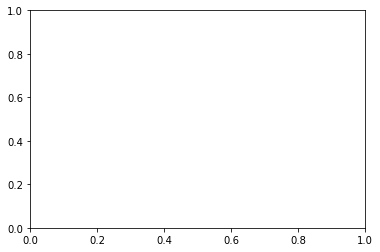

In [67]:
results_errors = [results[3*n-1] for n in range(int(len(results)/3))]
#print(results_errors)

 plt.plot(results_errors)

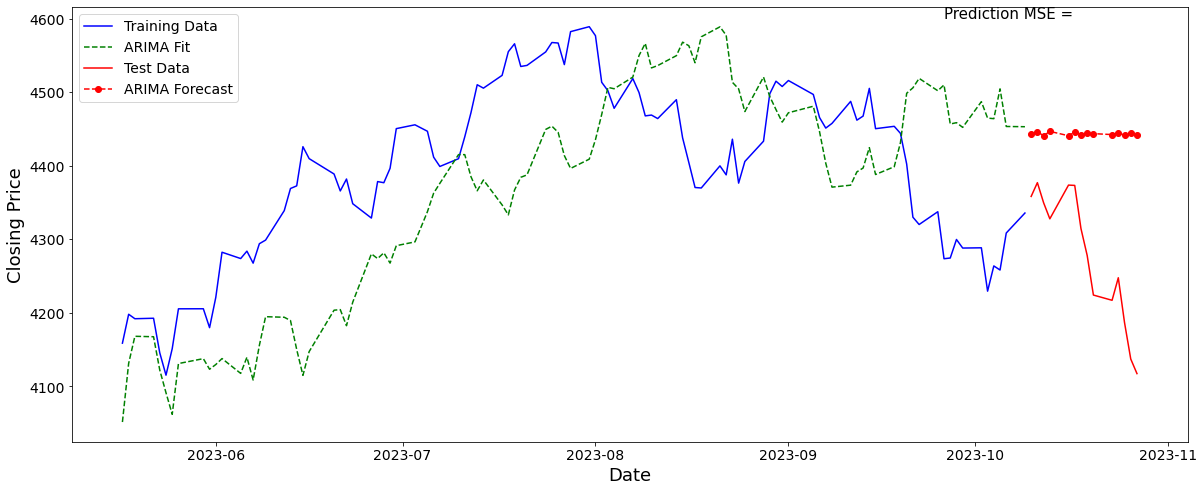

In [27]:
plt.figure(figsize=(20,8))


plt.plot(SP_train.Date[-100:], 
         SP_train.Close[-100:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(SP_train.Date[-100:], 
         arima.fittedvalues[-100:],
         'g--',
         label="ARIMA Fit")

plt.plot(SP_test.Date, 
         SP_test.Close,
         'r',
         label="Test Data")

plt.plot(SP_test.Date, 
             arima.forecast(len(SP_test)),
                 'r--o',
                 label="ARIMA Forecast")



plt.text(SP_train.Date.values[-10],
         4600,
         "Prediction MSE = ", fontsize=15)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

# Gradient Boosting 

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [598]:
starting = 5
#X=SP_df[['Open', 'High', 'Low']]
#X=SP_df[['Open', 'OvernightDiff']].iloc[1:]
#X = SP_df[['Open']].iloc[starting:]
X = SP_df[['Lag-1', 'Lag-2','Lag-3']].iloc[starting:]
#X = SP_df[['Lag-1', 'Lag-2', 'Lag-3', 'Lag-4', 'Lag-5', 'Lag-6', 'Lag-7']].iloc[starting:]
#X = SP_df[['RolAvg5']].iloc[starting:]
y1 = SP_df['Close'].iloc[starting:]
y2 = SP_df['DayDiff']
SP_date = SP_df['Date']

In [599]:
y1

5       1767.93
6       1762.97
7       1770.49
8       1747.15
9       1770.61
         ...   
2513    4217.04
2514    4247.68
2515    4186.77
2516    4137.23
2517    4117.37
Name: Close, Length: 2513, dtype: float64

Root Mean Squared Error (RMSE): 31.344425293470028


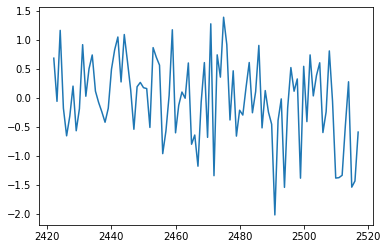

In [600]:
# Use TimeSeriesSplit for time-based splitting
tscv = TimeSeriesSplit(n_splits=25)  # Adjust the number of splits as needed

for train_index, test_index in tscv.split(X):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y1.iloc[train_index], y1.iloc[test_index]


# Initialize the Gradient Boosting Regressor
gb_model1 = GradientBoostingRegressor(n_estimators=120, learning_rate=0.07)

# Train the model
gb_model1.fit(X_train1, y_train1)

# Make predictions on the test set
y1_pred = gb_model1.predict(X_test1)

# Evaluate the model
pred_error_vector = y_test1 - y1_pred
pred_error_percentage = (y_test1 - y1_pred)*100/y_test1
mse = mean_squared_error(y_test1, y1_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.plot(pred_error_percentage)

[[50.0, 0.01, 906.8373024816893, 22.75459018735732, 20.479104574751478], [60.0, 0.01, 819.7555318725615, 20.657106881131103, 18.50844730540605], [70.0, 0.01, 741.6027599250149, 18.71494168880763, 16.741995834759326], [80.0, 0.01, 671.2876193733069, 16.91387901290625, 15.15474365122589], [90.0, 0.01, 607.5460029799493, 15.304106889499309, 13.712482814830727], [100.0, 0.01, 549.0290124625832, 13.926215815157436, 12.38599579474664], [110.0, 0.01, 495.7957210112519, 12.709476017224118, 11.177547607691606], [120.0, 0.01, 450.1974356331528, 11.624123084816965, 10.14466851025744], [130.0, 0.01, 408.0078325843026, 10.63351362846675, 9.18619216505243], [140.0, 0.01, 369.6590981068856, 9.71282314733377, 8.315270011445557], [150.0, 0.01, 335.96061535305853, 8.893103188263598, 7.550183790705418], [160.0, 0.01, 305.8827193685516, 8.206977039639204, 6.865267924192101], [170.0, 0.01, 278.05272930358507, 7.59838784179882, 6.231857232167648], [180.0, 0.01, 253.0056870720831, 7.041245682323871, 5.660609

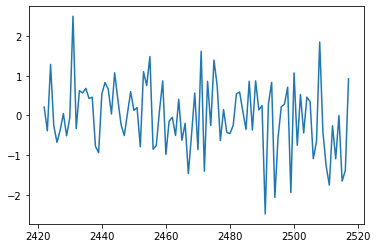

In [585]:
# Use TimeSeriesSplit for time-based splitting
tscv = TimeSeriesSplit(n_splits=25)  # Adjust the number of splits as needed

gb_tune_results = []

for train_index, test_index in tscv.split(X):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y1.iloc[train_index], y1.iloc[test_index]

for rate in np.linspace(0.01,0.2,20):
    for num_learners in np.linspace(50, 200, 16):
        # Initialize the Gradient Boosting Regressor
        gb_model1 = GradientBoostingRegressor(n_estimators=int(num_learners), learning_rate=rate)

        # Train the model
        gb_model1.fit(X_train1, y_train1)

        # Make predictions on the test set
        y1_pred = gb_model1.predict(X_test1)

        # Evaluate the model
        pred_error_vector = y_test1 - y1_pred
        pred_error_percentage = (y_test1 - y1_pred)*100/y_test1
        mse = mean_squared_error(y_test1, y1_pred)
        rmse = np.sqrt(mse)
        meanpercentage = np.mean(np.abs(pred_error_percentage))
        
        gb_tune_results.append([num_learners, rate, rmse, np.max(np.abs(pred_error_percentage)), meanpercentage])
        #print(f"Root Mean Squared Error (RMSE): {rmse}")

print(gb_tune_results)
plt.plot(pred_error_percentage)

In [591]:
array = np.array(gb_tune_results)

min_rmse_row = min(array, key=lambda x: x[2])  # x[2] corresponds to the third column (index 2)
min_ep_row = min(array, key=lambda x: x[3])  # x[3] corresponds to the fourth column (index 3)
min_meanep_row = min(array, key=lambda x: x[4])  # x[4] corresponds to the fifth column (index 4)
print("The experiment with the minimum value of RMSE:", np.round(min_rmse_row,4))
print("The experiment with the minimum value of Max EP:", np.round(min_ep_row,4))
print("The experiment with the minimum value of Mean EP:", np.round(min_meanep_row,4))

The experiment with the minimum value of RMSE: [1.20000e+02 7.00000e-02 3.13444e+01 2.01980e+00 5.69600e-01]
The experiment with the minimum value of Max EP: [50.      0.09   34.4253  1.6718  0.6416]
The experiment with the minimum value of Mean EP: [1.30000e+02 7.00000e-02 3.13709e+01 2.01480e+00 5.68100e-01]


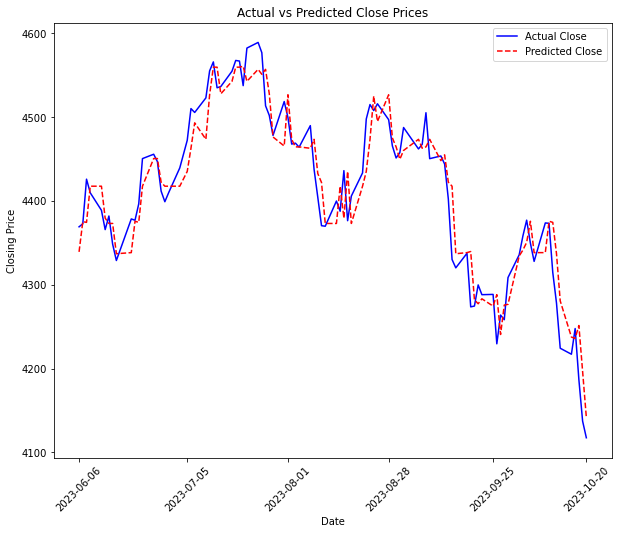

In [609]:
plt.figure(figsize=(10, 8))

# Plot actual Close values
plt.plot(SP_df['Date'].iloc[test_index], y_test1, label='Actual Close', color='blue')

# Plot predicted Close values
plt.plot(SP_df['Date'].iloc[test_index], y1_pred, label='Predicted Close', color='red', linestyle='dashed')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Close Prices')
plt.xticks(SP_df['Date'].iloc[test_index].iloc[[0,19, 38,57,76,95]])
plt.xticks(fontsize = 10, rotation =45)
plt.legend()

# Show the plot
plt.show()
# Make sure to adjust the color, linestyle, and other parameters as needed for your visualization preferences. 
#You can do the same for the other target (OpCl) by replacing the relevant variables (y_test2, y2_pred).

In [ ]:
plt.figure(figsize=(20, 8))

# Plot actual Close values
plt.plot(y_test1.index, y_test1, label='Actual Close', color='blue')

# Plot predicted Close values
plt.plot(y_test1.index, y1_pred, label='Predicted Close', color='red', linestyle='dashed')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()

# Show the plot
plt.show()
# Make sure to adjust the color, linestyle, and other parameters as needed for your visualization preferences. 
#You can do the same for the other target (OpCl) by replacing the relevant variables (y_test2, y2_pred).

array([1, 1])

In [198]:
np.linspace(50, 200, 16)

array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.,
       160., 170., 180., 190., 200.])

In [199]:
np.linspace(0.01,0.2,20)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [581]:
data = pred_error_percentage

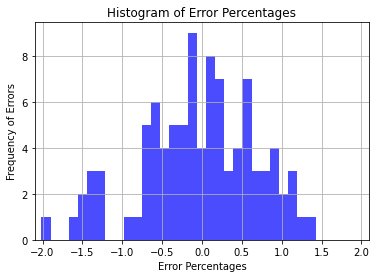

In [584]:
# Creating a histogram
plt.hist(data, bins=30, alpha=0.7, color='blue')  # Adjust the number of bins as needed
plt.title('Histogram of Error Percentages')
plt.xlabel('Error Percentages')
plt.ylabel('Frequency of Errors')
plt.xlim([-2.1,2.1])
plt.grid(True)
plt.show()


In [227]:
np.sort(data)

array([0.01990032, 0.02704331, 0.03720666, 0.04518914, 0.07028681,
       0.07457986, 0.0944773 , 0.09500471, 0.09981253, 0.1268768 ,
       0.13104824, 0.13246694, 0.15040101, 0.15750064, 0.15841248,
       0.16160202, 0.16296755, 0.1631697 , 0.1751113 , 0.18336523,
       0.18935371, 0.18973631, 0.19750881, 0.20023965, 0.21413724,
       0.22805597, 0.24005707, 0.24658178, 0.30991061, 0.31148686,
       0.31305465, 0.31616437, 0.32650181, 0.3265805 , 0.35856476,
       0.37159803, 0.38083944, 0.3816164 , 0.3834723 , 0.39180684,
       0.39847452, 0.4006504 , 0.41998914, 0.42278931, 0.42591995,
       0.46857725, 0.47103498, 0.49083408, 0.49893987, 0.51362033,
       0.52215307, 0.52525083, 0.52838685, 0.56836932, 0.60717097,
       0.61333719, 0.64457097, 0.65403267, 0.74654648, 0.75545996,
       0.7838212 , 0.79348784, 0.81477944, 0.81821317, 0.84977845,
       0.86745518, 0.87229043, 0.88610728, 0.89804791, 0.89892935,
       0.90016944, 0.90081525, 0.96427917, 0.98142724, 0.98646

# Classification Tasks

In [254]:
SP_df['Momentum'] = (SP_df['Close'] > SP_df['Close'].shift(1)).astype(int)
SP_df['IndexMomentum'] = 0.2*(SP_df['Momentum'].shift(1) + SP_df['Momentum'].shift(2) + SP_df['Momentum'].shift(3) + SP_df['Momentum'].shift(4) + SP_df['Momentum'].shift(5))

SP_df['Volatility'] = (SP_df['Close'].shift(1)-SP_df['Close'])/SP_df['Close'].shift(1)
SP_df['IndexVolatility'] = 0.2*(SP_df['Volatility'].shift(1) + SP_df['Volatility'].shift(2) + SP_df['Volatility'].shift(3) + SP_df['Volatility'].shift(4) + SP_df['Volatility'].shift(5))

In [255]:
SP_df.head(10)

,Date,Close,Open,High,Low,HLDiff,DayDiff,OvernightDiff,Move,Lag-1,...,Lag-4,Lag-5,Lag-6,Lag-7,RolAvg7,RolAvg5,Momentum,IndexMomentum,Volatility,IndexVolatility
0,2013-10-28,1762.11,1759.42,1764.99,1757.67,7.32,2.69,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2013-10-29,1771.95,1762.93,1772.09,1762.93,9.16,9.02,0.82,0,1762.11,...,NaN,NaN,NaN,NaN,1762.110000,1762.1100,1,NaN,-0.005584,NaN
2,2013-10-30,1763.31,1772.27,1775.22,1757.24,17.98,-8.96,0.32,0,1771.95,...,NaN,NaN,NaN,NaN,1767.030000,1767.0300,0,NaN,0.004876,NaN
3,2013-10-31,1756.54,1763.24,1768.53,1755.72,12.81,-6.70,-0.07,1,1763.31,...,NaN,NaN,NaN,NaN,1765.790000,1765.7900,0,NaN,0.003839,NaN
4,2013-11-01,1761.64,1758.70,1765.67,1752.70,12.97,2.94,2.16,1,1756.54,...,1762.11,NaN,NaN,NaN,1763.477500,1763.4775,1,NaN,-0.002903,NaN
5,2013-11-04,1767.93,1763.40,1768.78,1761.56,7.22,4.53,1.76,0,1761.64,...,1771.95,1762.11,NaN,NaN,1763.110000,1763.1100,1,0.4,-0.003571,NaN
6,2013-11-05,1762.97,1765.67,1767.03,1755.76,11.27,-2.70,-2.26,1,1767.93,...,1763.31,1771.95,1762.11,NaN,1763.913333,1764.2740,0,0.6,0.002806,-0.000669
7,2013-11-06,1770.49,1765.00,1773.74,1764.40,9.34,5.49,2.03,0,1762.97,...,1756.54,1763.31,1771.95,1762.11,1763.778571,1762.4780,1,0.4,-0.004266,0.001009
8,2013-11-07,1747.15,1770.74,1774.54,1746.20,28.34,-23.59,0.25,1,1770.49,...,1761.64,1756.54,1763.31,1771.95,1764.975714,1763.9140,0,0.6,0.013183,-0.000819
9,2013-11-08,1770.61,1748.37,1770.78,1747.63,23.15,22.24,1.22,1,1747.15,...,1767.93,1761.64,1756.54,1763.31,1761.432857,1762.0360,1,0.6,-0.013428,0.001050


In [508]:
#SP_cl = SP_df[['Date', 'Close','Momentum', 'IndexMomentum', 'Volatility', 'IndexVolatility']].iloc[6:]
SP_cl = SP_df[['Date', 'Close','Momentum', 'IndexMomentum', 'Lag-1','Lag-2','Lag-3','Lag-4','Lag-5']].iloc[6:]

In [509]:
SP_cl =  SP_cl.reset_index(drop=True)

In [510]:
SP_cl

,Date,Close,Momentum,IndexMomentum,Lag-1,Lag-2,Lag-3,Lag-4,Lag-5
0,2013-11-05,1762.97,0,0.6,1767.93,1761.64,1756.54,1763.31,1771.95
1,2013-11-06,1770.49,1,0.4,1762.97,1767.93,1761.64,1756.54,1763.31
2,2013-11-07,1747.15,0,0.6,1770.49,1762.97,1767.93,1761.64,1756.54
3,2013-11-08,1770.61,1,0.6,1747.15,1770.49,1762.97,1767.93,1761.64
4,2013-11-11,1771.89,1,0.6,1770.61,1747.15,1770.49,1762.97,1767.93
...,...,...,...,...,...,...,...,...,...
2507,2023-10-23,4217.04,0,0.2,4224.16,4278.00,4314.60,4373.20,4373.63
2508,2023-10-24,4247.68,1,0.0,4217.04,4224.16,4278.00,4314.60,4373.20
2509,2023-10-25,4186.77,0,0.2,4247.68,4217.04,4224.16,4278.00,4314.60
2510,2023-10-26,4137.23,0,0.2,4186.77,4247.68,4217.04,4224.16,4278.00


In [511]:
tss = TimeSeriesSplit(n_splits = 4)

In [512]:
X = SP_cl.drop(labels=['Date', 'Momentum','Close', 'IndexMomentum'], axis=1)
y = SP_cl['Momentum']

In [513]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [514]:
X_train

,Lag-1,Lag-2,Lag-3,Lag-4,Lag-5
0,1767.93,1761.64,1756.54,1763.31,1771.95
1,1762.97,1767.93,1761.64,1756.54,1763.31
2,1770.49,1762.97,1767.93,1761.64,1756.54
3,1747.15,1770.49,1762.97,1767.93,1761.64
4,1770.61,1747.15,1770.49,1762.97,1767.93
...,...,...,...,...,...
2005,4549.78,4536.19,4519.63,4486.46,4471.37
2006,4544.90,4549.78,4536.19,4519.63,4486.46
2007,4566.48,4544.90,4549.78,4536.19,4519.63
2008,4574.79,4566.48,4544.90,4549.78,4536.19


In [515]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [516]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    return pred

In [517]:
for k in range(1,10):
    print(classification_report(y_test, KNN(k)))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45       264
           1       0.49      0.67      0.57       238

    accuracy                           0.52       502
   macro avg       0.53      0.53      0.51       502
weighted avg       0.53      0.52      0.51       502

              precision    recall  f1-score   support

           0       0.54      0.72      0.62       264
           1       0.51      0.32      0.40       238

    accuracy                           0.53       502
   macro avg       0.53      0.52      0.51       502
weighted avg       0.53      0.53      0.51       502

              precision    recall  f1-score   support

           0       0.55      0.33      0.41       264
           1       0.49      0.71      0.58       238

    accuracy                           0.51       502
   macro avg       0.52      0.52      0.49       502
weighted avg       0.52      0.51      0.49       502

              preci

In [518]:
SP_cl.head(10)

,Date,Close,Momentum,IndexMomentum,Lag-1,Lag-2,Lag-3,Lag-4,Lag-5
0,2013-11-05,1762.97,0,0.6,1767.93,1761.64,1756.54,1763.31,1771.95
1,2013-11-06,1770.49,1,0.4,1762.97,1767.93,1761.64,1756.54,1763.31
2,2013-11-07,1747.15,0,0.6,1770.49,1762.97,1767.93,1761.64,1756.54
3,2013-11-08,1770.61,1,0.6,1747.15,1770.49,1762.97,1767.93,1761.64
4,2013-11-11,1771.89,1,0.6,1770.61,1747.15,1770.49,1762.97,1767.93
5,2013-11-12,1767.69,0,0.6,1771.89,1770.61,1747.15,1770.49,1762.97
6,2013-11-13,1782.00,1,0.6,1767.69,1771.89,1770.61,1747.15,1770.49
7,2013-11-14,1790.62,1,0.6,1782.00,1767.69,1771.89,1770.61,1747.15
8,2013-11-15,1798.18,1,0.8,1790.62,1782.00,1767.69,1771.89,1770.61
9,2013-11-18,1791.53,0,0.8,1798.18,1790.62,1782.00,1767.69,1771.89


In [527]:
svm_poly = svm.SVC(kernel='poly', degree = 2)
svm_poly.fit(X_train,y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       264
           1       0.47      1.00      0.64       238

    accuracy                           0.47       502
   macro avg       0.24      0.50      0.32       502
weighted avg       0.22      0.47      0.30       502



C:\Users\hites\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hites\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hites\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [520]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred_svm_linear))

              precision    recall  f1-score   support

           0       0.59      0.09      0.15       264
           1       0.48      0.93      0.63       238

    accuracy                           0.49       502
   macro avg       0.53      0.51      0.39       502
weighted avg       0.54      0.49      0.38       502



In [521]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [522]:
y_pred_dtree = decision_tree.predict(X_test)

In [523]:
metrics.confusion_matrix(y_test, y_pred_dtree)

array([[ 94, 170],
       [ 98, 140]], dtype=int64)

In [524]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.49      0.36      0.41       264
           1       0.45      0.59      0.51       238

    accuracy                           0.47       502
   macro avg       0.47      0.47      0.46       502
weighted avg       0.47      0.47      0.46       502



In [525]:
random_forest = RandomForestClassifier(max_depth=1, random_state=5)

In [526]:
random_forest.fit(X_train,y_train)
y_pred_random_forest = random_forest.predict(X_test)
print(classification_report(y_test,y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.54      0.15      0.23       264
           1       0.48      0.86      0.61       238

    accuracy                           0.49       502
   macro avg       0.51      0.50      0.42       502
weighted avg       0.51      0.49      0.41       502



In [608]:
len(test_index)

96